In [2]:
# by 13/11/22, yeah, why not, of course, I can do it.
# solved in python
# rememebre to write pdf report

In [3]:
# set up the environment
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
from itertools import combinations_with_replacement

# Exercise 1
Consider the following network:

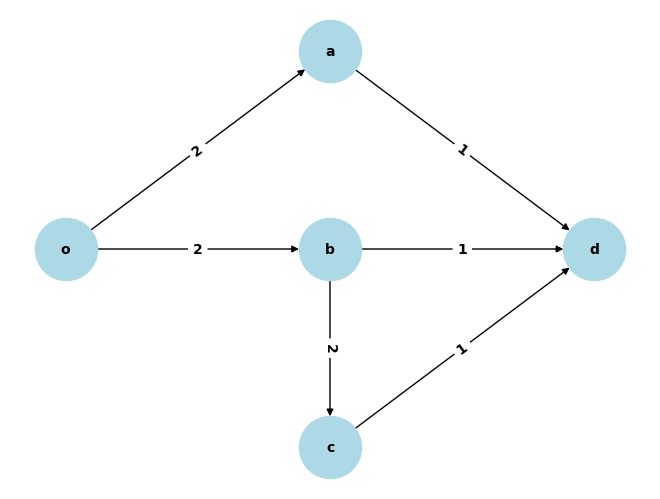

In [4]:
# CREATE A DIRECTED GRAPH:
G = nx.DiGraph()

# ADD EDGES TO GRAPH:
G.add_nodes_from(['a','b','c','d','o'])
G.add_edges_from([
    ('a','d'),
    ('b','d'),
    ('c','d'),
    ('o','b'),
    ('b','c'),
    ('c','d'),
    ('o','a'),
])

# ADD CAPACITIES TO EDGES:
c2 = c4 = c6 = 1
c1 = c3 = c5 = 2
# c1 belong to edge e1 ('o','a'):
G['o']['a']['c'] = c1
# c2 belong to edge e2 ('a','d'):
G['a']['d']['c'] = c2
# c3 belong to edge e3 ('o','b'):
G['o']['b']['c'] = c3
# c4 belong to edge e4 ('b','d'):
G['b']['d']['c'] = c4
# c5 belong to edge e5 ('b','c'):
G['b']['c']['c'] = c5
# c6 belong to edge e6 ('c','d'):
G['c']['d']['c'] = c6

# DRAW THE GRAPH:
# Get edge labels:
edge_labels = nx.get_edge_attributes(G, 'c')
#set node positions:
node_positions = {
    'o': (0, 1),
    'a': (1, 2),
    'b': (1, 1),
    'c': (1, 0),
    'd': (2, 1)
}
nx.draw(G, node_positions, with_labels=True, node_color='lightblue', font_size=10, font_weight='bold', node_size=2000)
nx.draw_networkx_edge_labels(G, node_positions, edge_labels=edge_labels, font_size=10, font_weight='bold')
# Show the plot
plt.show()


In [5]:
# SOLVE POINT A:
# (a) The minimum aggregate capacity that needs to be removed 
# for no feasible flow from o to d to exist is equal to the 
# maximum flow in the graph. We can find this using the 
# Ford-Fulkerson algorithm.

# Find the maximum flow in the graph
new_max_flow, flow_dict = nx.maximum_flow(G, 'o', 'd', capacity='c')
print(f"Minimum aggregate capacity to be removed: {new_max_flow}")

Minimum aggregate capacity to be removed: 3


In [6]:
# SOLVE POINT B:
# (b) The maximum aggregate capacity that can be removed 
# from the links without affecting the maximum throughput 
# from o to d is equal to the difference between the sum 
# of all capacities and the maximum flow.

# Calculate the sum of all capacities
total_capacity = sum([G[u][v]['c'] for u, v in G.edges])

# Calculate the maximum aggregate capacity that can be removed
max_capacity_removed = total_capacity - new_max_flow
print(f"Maximum aggregate capacity that can be removed: {max_capacity_removed}")

Maximum aggregate capacity that can be removed: 6


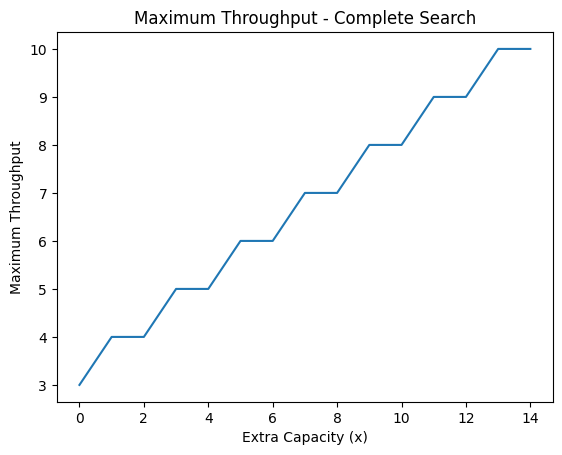

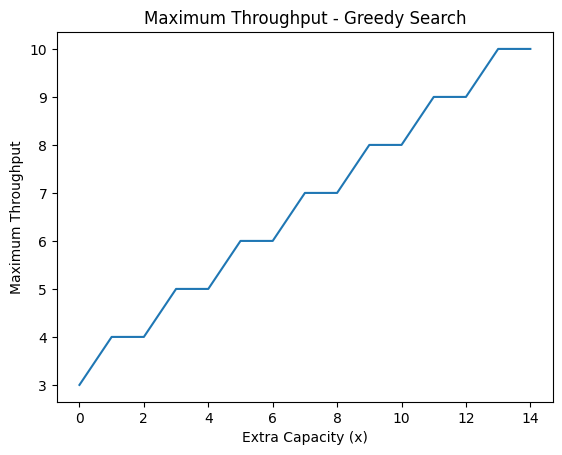

In [7]:
# SOLVE POINT C:
# (c) To distribute the x extra units of capacity to maximize 
# the throughput from o to d, we can iteratively add the extra 
# capacity to the edges in the minimum cut and calculate the 
# maximum flow, and the new minimum cut.

# We can then plot the maximum throughput as a function of x.
# if we have to add a total capacity of 10
# let's explore the whole space of possibilities:
# start by adding 1 to an edge and then add 1 to another edge and so on, until 10 is reached
# do it for each possible combination of edges, you can also use an edge twice

# all possible combinations of edges, you can use an edge as many times as you want, 5 edges, 10 times
# 5^10 = 9765625
# python code:
edges = G.edges
total_capacity = 14

# global approach, which is not feasible for larger graphs
def calculate_max_flow(G, total_capacity):
    current_max_flow = 0
    for combination in combinations_with_replacement(edges, total_capacity):
        temp_g = G.copy()
        # add 1 to each edge in the combination
        for u,v in combination:
            temp_g[u][v]['c'] += 1
            
        # calculate the maximum flow
        new_max_flow = nx.maximum_flow_value(temp_g, 'o', 'd', capacity='c')
        if new_max_flow > current_max_flow:
            current_max_flow = new_max_flow
            # current_combination = combination
    return current_max_flow

x = np.arange(0, total_capacity+1, 1)
y = [calculate_max_flow(G, i) for i in range(total_capacity+1)]

# Plot the maximum throughput as a function of x
plt.plot(x, y)
plt.xlabel('Extra Capacity (x)')
plt.ylabel('Maximum Throughput')
plt.title('Maximum Throughput - Complete Search')
plt.show()

# greedy approach, based on the minimum cut
def choose_edge(G):
    # calculate the minimum cut
    max_flow, (source_set, target_set) = nx.minimum_cut(G, 'o', 'd', capacity='c')

    # Find the minimum cut edges
    min_cut_edges = [(u, v) for u in source_set for v in target_set if G.has_edge(u, v)]
    
    for u,v in min_cut_edges:
        # increase the capacity of the edge by 1, and calculate the new maximum flow
        G[u][v]['c'] += 1
        current_max_flow = nx.maximum_flow_value(G, 'o', 'd', capacity='c')
        G[u][v]['c'] -= 1
        
        # check if the new maximum flow is greater than the current maximum flow
        # return the edge if it is
        if current_max_flow > max_flow:
            return u,v
        
    # return a random edge if no edge increases the maximum flow
    # return random.choice(min_cut_edges)   
    return random.choice(min_cut_edges)
    
def extra_capacity_distributor(G, total_capacity):
    for i in range(total_capacity):
        # choose the edge, from the minimum cut, that increases the maximum flow.
        u,v = choose_edge(G)
            
        # increase the capacity of the edge by 1
        G[u][v]['c'] += 1
        
        # return the new maximum flow
        yield nx.minimum_cut_value(G, 'o', 'd', capacity='c')

# Plot the maximum throughput as a function of x
x = np.arange(0, total_capacity+1, 1)
new_max_flow = nx.maximum_flow_value(G, 'o', 'd', capacity='c')
y = [new_max_flow] + [max_flow for max_flow in extra_capacity_distributor(G.copy(), total_capacity)]

# Plot the maximum throughput as a function of x
plt.plot(x, y)
plt.xlabel('Extra Capacity (x)')
plt.ylabel('Maximum Throughput')
plt.title('Maximum Throughput - Greedy Search')
plt.show()


## Theorems concepts behind the code:

1. Ford-Fulkerson algorithm: This algorithm is used to find the maximum flow in a flow network. It iteratively finds augmenting paths from the source to the sink and increases the flow along these paths until no more augmenting paths can be found.

2. Minimum cut: A cut is a partition of the nodes of a graph into two disjoint sets, one containing the source and the other containing the sink. The capacity of a cut is the sum of capacities of the edges crossing the cut. The minimum cut is the with the smallest capacity. According to the max-flow min-cut theorem, the maximum flow in a network is equal to the minimum cut.

3. Maximum throughput: The maximum throughput is the maximum amount of flow that can be sent from the source to the sink in a flow network. It is equal to the maximum flow found using the Ford-Fulkerson algorithm.
